In [601]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [602]:
df1 = pd.read_csv(r'D:\Seksatta\MKG\summary lizard R&D\pcb_2020.csv')
df2 = pd.read_csv(r'D:\Seksatta\MKG\summary lizard R&D\pcb_2021.csv')


In [603]:
file_path = r'D:\Seksatta\MKG\summary lizard R&D\pcb_2022.csv'
df3 = pd.read_csv(file_path, encoding='utf-8')

In [604]:
df = pd.concat([df1,df2, df3], 
          keys=[2020, 2021, 2022])

In [605]:
df.reset_index(inplace =True)
df.drop(columns = ['level_1'], axis=1, inplace=True)

In [606]:
df.rename(columns={'level_0':'year'}, inplace=True)

In [607]:
df['error_code'] = df['Problem'].str.extract(r'(\b\w{2})\s')

In [608]:
def antmal(x):
    ant_match = re.search(r'\b[Aa]nt\b(?!\s*\band\b)', x)
    lizard_match = re.search(r'\b[Ll][ie](?!\s*\band\b)', x)
    
    if ant_match and lizard_match:
        return 'both'
    elif ant_match:
        return 'ant'
    elif lizard_match:
        return 'lizard'
    else:
        return 'none'



In [609]:
df['animal'] = df['Visual check'].apply(antmal)

In [610]:
df.columns

Index(['year', 'MKG No.', 'Parts  and cover page', 'Finished date', 'Period',
       'Part', 'Model', 'Serial', 'Drawing', 'Problem', 'Vender name',
       'Visual check', 'Resitance check', 'Operation check by Jig', 'Judgment',
       '  MKG No.', 'Parts  received from MKG',
       'Finished basic investigation date', 'Send parts to supplier date',
       'Part Name', 'Model Type', 'Resistance check', 'error_code', 'animal'],
      dtype='object')

In [611]:
df2 = df.loc[:,['year', 'MKG No.', 'Model', 'Serial', 'Drawing', 'error_code', 'animal']]
df2

,year,MKG No.,Model,Serial,Drawing,error_code,animal
0,2020,2210.0,2MKC30QVM4,E007339,2P438792-2,NaN,ant
1,2020,75.0,RKQ12TV2S,E007399,2P416384-10,NaN,lizard
2,2020,162.0,FTKQ15TV2S,E006048,2P406592-11,NaN,lizard
3,2020,204.0,FTKQ09TV2S,E002809,2P409592-11,A6,ant
4,2020,144.0,ARKC12RV2S,E009028,2P390290-1,L5,lizard
...,...,...,...,...,...,...,...
228,2022,NaN,RKZ12VV2S,E002061,2P582816-24,NaN,lizard
229,2022,NaN,RKQ15UV2S,E001163,2P582816-1,L5,lizard
230,2022,NaN,RKQ24UV2S,E007651,2P494704-13,E7,lizard
231,2022,NaN,FTKQ15UV2S,E003301,2P406592-11,NaN,lizard


In [612]:
df.groupby(['year','animal'])['Serial'].count()

year  animal
2020  ant       16
      both       3
      lizard    84
2021  both       5
      lizard    93
2022  lizard    32
Name: Serial, dtype: int64

In [613]:
model = pd.read_csv(r'C:\Users\seksatta\Desktop\model.csv')
model['model_name'] = model['model_name'].str.strip()

In [614]:
model.columns

Index(['model_name', 'base_model', 'group'], dtype='object')

**ข้อมูลจิ้งจก เก็บอยู่ใน df3**

In [615]:
df3 = pd.merge(df2, model[['model_name', 'base_model','group']], left_on='Model', right_on='model_name', how='left')


In [616]:
df3

,year,MKG No.,Model,Serial,Drawing,error_code,animal,model_name,base_model,group
0,2020,2210.0,2MKC30QVM4,E007339,2P438792-2,NaN,ant,2MKC30QVM4,BMS,RA
1,2020,75.0,RKQ12TV2S,E007399,2P416384-10,NaN,lizard,RKQ12TV2S,GSI,RA
2,2020,162.0,FTKQ15TV2S,E006048,2P406592-11,NaN,lizard,FTKQ15TV2S,BMS,RA
3,2020,204.0,FTKQ09TV2S,E002809,2P409592-11,A6,ant,FTKQ09TV2S,BMS,RA
4,2020,144.0,ARKC12RV2S,E009028,2P390290-1,L5,lizard,ARKC12RV2S,GSI,RA
...,...,...,...,...,...,...,...,...,...,...
228,2022,NaN,RKZ12VV2S,E002061,2P582816-24,NaN,lizard,RKZ12VV2S,BMS,RA
229,2022,NaN,RKQ15UV2S,E001163,2P582816-1,L5,lizard,RKQ15UV2S,BMS,RA
230,2022,NaN,RKQ24UV2S,E007651,2P494704-13,E7,lizard,RKQ24UV2S,SF2,RA
231,2022,NaN,FTKQ15UV2S,E003301,2P406592-11,NaN,lizard,FTKQ15UV2S,BMS,RA


In [617]:
aoq1 = pd.read_csv(r'D:\Seksatta\MKG\summary lizard R&D\AOQ-VIS 010120-311223\aoq1.csv')
aoq2 = pd.read_csv(r'D:\Seksatta\MKG\summary lizard R&D\AOQ-VIS 010120-311223\aoq2.csv')
aoq3 = pd.read_csv(r'D:\Seksatta\MKG\summary lizard R&D\AOQ-VIS 010120-311223\aoq3.csv')

In [618]:
df = pd.concat([aoq1, aoq2, aoq3], keys=[1,2,3])

In [619]:
df.reset_index(inplace=True)

In [620]:
df.drop(columns = ['level_0', 'level_1'], inplace =True)


In [621]:
df.columns

Index(['SITE', 'FAC_MODEL', 'FAC_SERIAL', 'SYMPTOM_DESC',
       'FAILURE_PART_DESC_FINAL', 'FY_OF_CLAIM'],
      dtype='object')

In [622]:
df.drop_duplicates(subset = ['FAC_MODEL', 'FAC_SERIAL'], inplace=True)

In [623]:

df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.replace(r'\b[dD]oest', 'Does', regex= True)
df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.replace(r' /', '/', regex= True)
df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.replace(r' /', '/', regex= True).str.rstrip('.')
df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.replace(r'A/C', '', regex= True)
df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.strip()
df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.upper()
df['SYMPTOM_DESC']=df['SYMPTOM_DESC'].str.replace(r'10 :  DOES NOT OPERATE', '10 : DOES NOT OPERATE', regex= False)

In [624]:
df = df[df['FAILURE_PART_DESC_FINAL'].str.contains(r'\bPCB\b', case=False, regex=True)]

In [625]:
df['SYMPTOM_DESC'].value_counts()

SYMPTOM_DESC
N/A : N/A                            19522
00 : DOES NOT COOL/HEAT              16173
11 : ABNORMAL OPERATE                11278
10 : DOES NOT OPERATE                10131
99 : OTHER                            2210
                                     ...  
18 : WATER LEAK                          2
16 : REPLACE/ RELOCATE FCU               2
28 : RECTIFICATION WORKS TO UNITS        1
24 : VIBRATION                           1
16 : INSTALL NEW ONE                     1
Name: count, Length: 64, dtype: int64

In [626]:
df.columns

Index(['SITE', 'FAC_MODEL', 'FAC_SERIAL', 'SYMPTOM_DESC',
       'FAILURE_PART_DESC_FINAL', 'FY_OF_CLAIM'],
      dtype='object')

In [627]:
def get_top_5(group):
    return group.nlargest(5, 'COUNT')

In [628]:
df.groupby(['FY_OF_CLAIM', 'SYMPTOM_DESC'])['FAC_SERIAL'].count().reset_index()

,FY_OF_CLAIM,SYMPTOM_DESC,FAC_SERIAL
0,2019,00 : DOES NOT COOL/HEAT,1750
1,2019,"01 : DOES NOT COOL/HEAT (OUTDOOR-NG,INDOOR-NG)",6
2,2019,"01 : DOES NOT COOL/HEAT. (OUTDOOR- NG, INDOOR-...",211
3,2019,"02 : DOES NOT COOL/HEAT (OUTDOOR-NG,INDOOR-OK)",30
4,2019,"02 : DOES NOT COOL/HEAT. (OUTDOOR- NG, INDOOR-...",173
...,...,...,...
234,2024,61 : PERIODIC INSPECTION,41
235,2024,72 : CLEANING CONDENSER/EVAP WITH CHEMICAL,1
236,2024,98 : SERVICE VISIT JOB,1
237,2024,99 : OTHER,82


In [629]:
g= df.groupby(['FY_OF_CLAIM', 'SYMPTOM_DESC'])['FAC_SERIAL'].count().reset_index()

In [630]:
top4 = g.groupby('FY_OF_CLAIM').apply(lambda x: x.nlargest(4, 'FAC_SERIAL'))

C:\Users\seksatta\AppData\Local\Temp\ipykernel_16732\2645635076.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top4 = g.groupby('FY_OF_CLAIM').apply(lambda x: x.nlargest(4, 'FAC_SERIAL'))


In [631]:
pivot = top4.pivot(index='FY_OF_CLAIM', columns='SYMPTOM_DESC', values='FAC_SERIAL').fillna(0)


In [632]:
pivot

SYMPTOM_DESC,00 : DOES NOT COOL/HEAT,10 : DOES NOT OPERATE,11 : ABNORMAL OPERATE,99 : OTHER,N/A : N/A
FY_OF_CLAIM,,,,,
2019,1750.0,1871.0,2325.0,0.0,2814.0
2020,8986.0,5307.0,6256.0,0.0,4262.0
2021,3858.0,2127.0,2309.0,0.0,1375.0
2022,434.0,255.0,288.0,0.0,2549.0
2023,498.0,197.0,0.0,45.0,4398.0
2024,573.0,166.0,0.0,82.0,3880.0


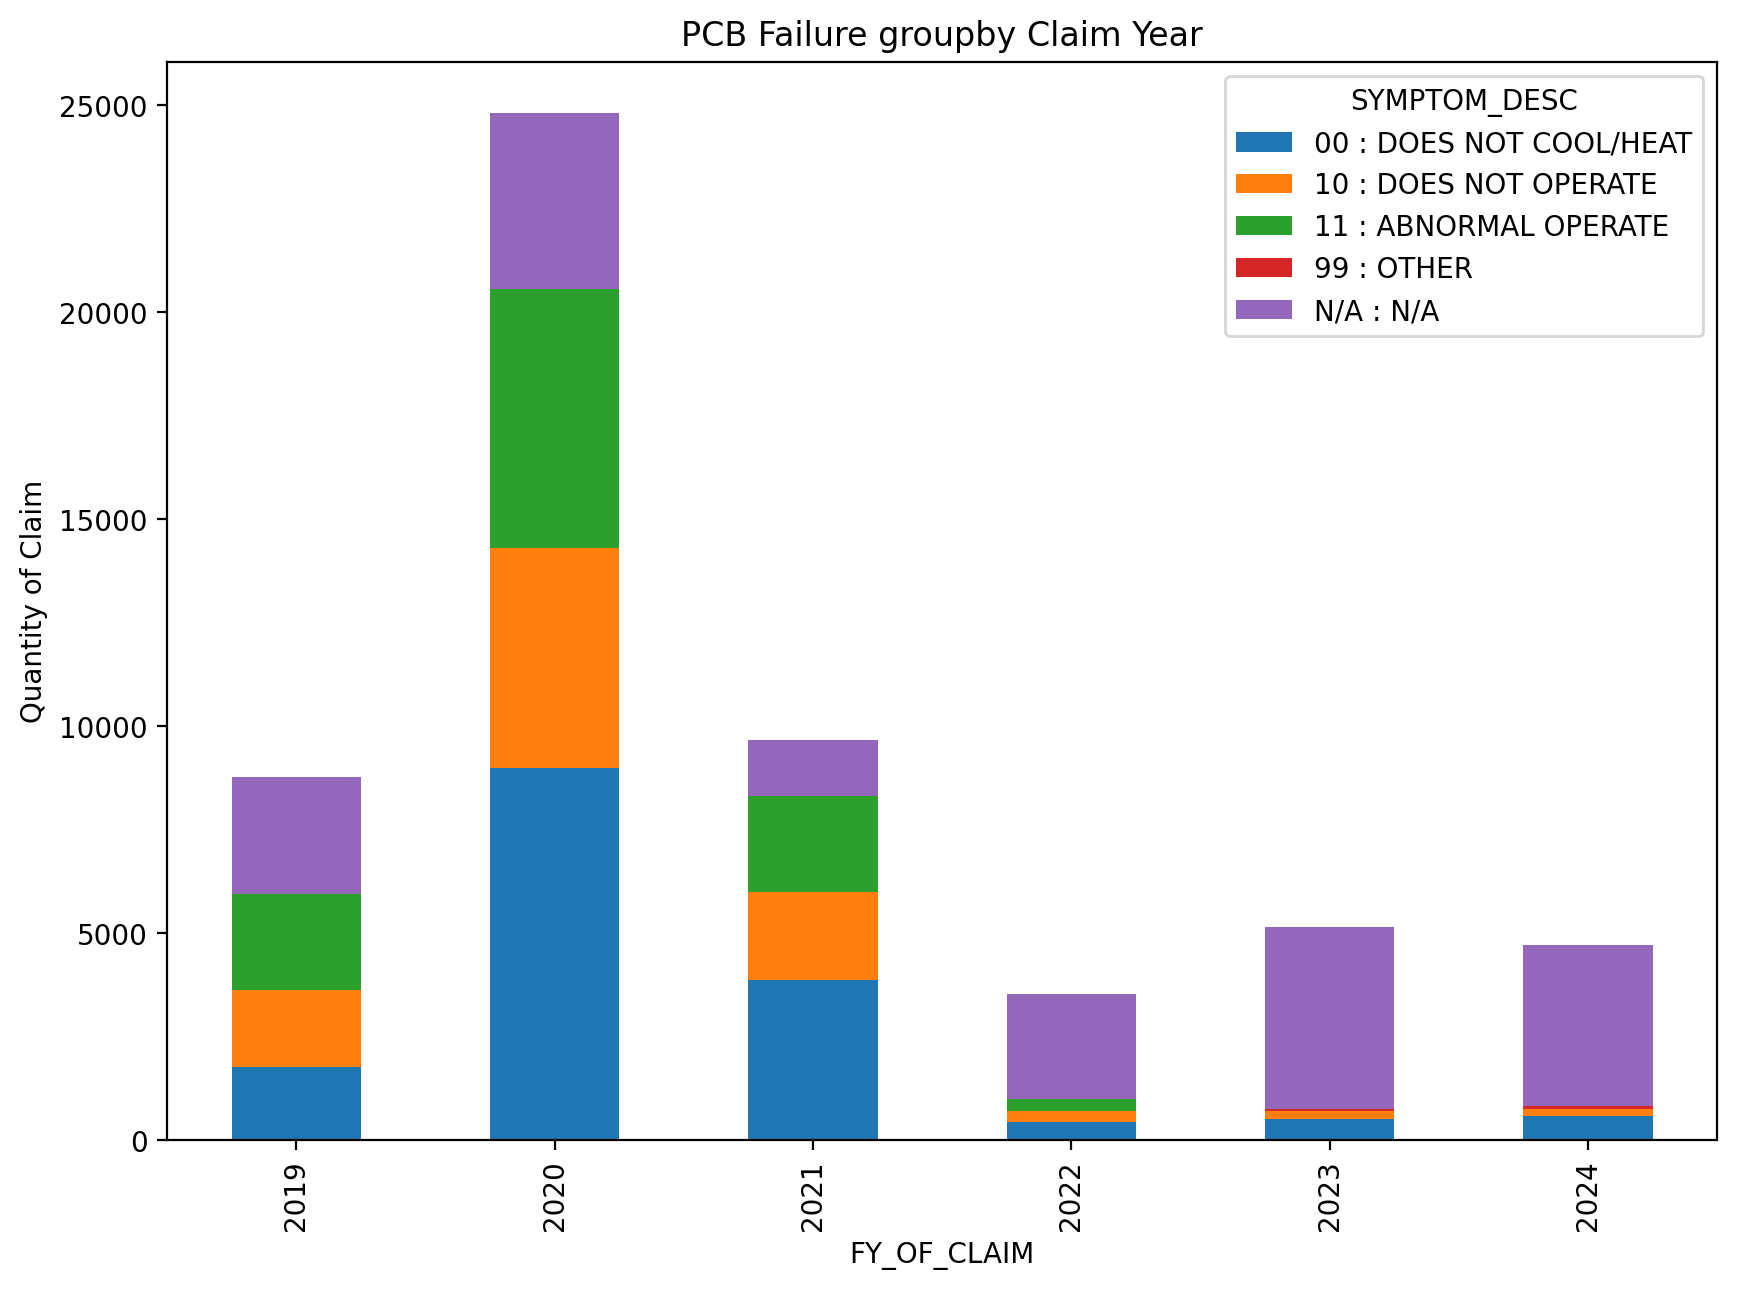

In [639]:
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.ylabel('Quantity of Claim')
plt.title('PCB Failure groupby Claim Year')

plt.show()

In [ ]:
plt.savefig('stacked_bar_plot.jpeg') 

In [ ]:
df3

In [ ]:
g = df3.groupby(['year','animal'])['Serial'].count().reset_index()

In [ ]:
pivot = pd.pivot_table(g, index='year', columns='animal', values='Serial', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')

In [ ]:
pivot

In [ ]:
pivot.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title("Ant and Lizard Infestation/Invasion")
plt.ylabel("Qty")